In [1]:
#Homework 2: Alexander Jenouri - RIN: 661959489

In [2]:
#Problem 1
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
#%notebook inline
#import matplotlib.pyplot as plt

X = iris.data
X_new = np.zeros((150,2))
for j in range(2):
    for i in range(len(X)):
        X_new[i,j] = X[i,j+j] / X[i,j+j+1]
#new features are: (1) sepal length/sepal width and (2) pedal length/pedal width
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X_new,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

accuracy score : 0.75


In [3]:
#Problem 2
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("training images shapes: ", x_train.shape)
print("testing images shapes: ", x_test.shape)
print("training targets shapes: ", y_train.shape)
print("testing targers shapes: ", y_test.shape)

def odd_remover(x,y):
  """x is the images set, y is the results set"""

  y_new = []
  x_new = []
  for i in range(len(y)):
    if (y[i] % 2) == 0:
      y_new.append(y[i])
      x_new.append(x[i])
    else:
      pass
  return x_new, y_new

def wrangler(x):
  """takes image matrix and transforms it into a 1D array"""
  
  x_new = np.zeros((len(x[0])**2,len(x))) #x_new has rows=28*28 and columns=len(x)
  for i in range(len(x)):
    x_new[:,i] = x[i].reshape(-1)
  return x_new


x_train, y_train = odd_remover(x_train,y_train)
x_test, y_test = odd_remover(x_test,y_test)

x_train = np.transpose(wrangler(x_train))
x_test = np.transpose(wrangler(x_test))


from sklearn.neighbors import KNeighborsClassifier
skmodel = KNeighborsClassifier(n_neighbors=3)
skmodel.fit(x_train,y_train)
preds = skmodel.predict(x_test)
print('preds:', skmodel.predict(x_test))
print('actual:', y_test)

cm_sk = confusion_matrix(y_test, skmodel.predict(x_test))
ax = sns.heatmap(cm_sk,linewidths=2, annot=True, cmap='viridis', cbar=True);  
labels = [0,2,4,6,8]
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
plt.xlabel('Predicted Number');
plt.ylabel('Actual Number');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results (sklearn KNN model)', fontsize='medium', fontweight='bold');
print(classification_report(y_test, skmodel.predict(x_test)))

count_actual = 0
count_preds = 0
for i in range(len(y_test)):
  if y_test[i] == 6:
    count_actual += 1
    if preds[i] == y_test[i]:
      count_preds += 1
print("We cannot use a pairplot to visualize the data, since each feature is a vector.")
print("{} sixes were predicted correctly out of the {} true sixes".format(count_preds, count_actual))

ModuleNotFoundError: No module named 'tensorflow'

X_train shape : (105, 3)
X_test shape : (45, 3)
y_train shape : (105,)
y_test shape : (45,)


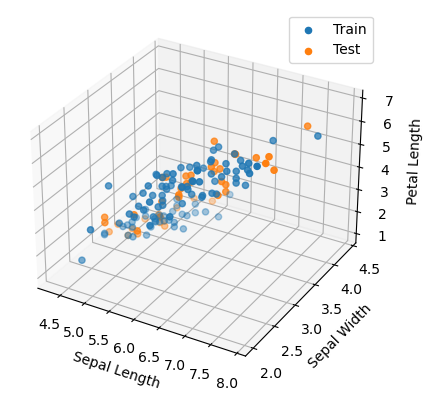

predicted_labels: [0 0 0 0 0 1 1 0 2 1 0 1 0 2 0 2 0 0 2 1 1 2 2 0 1 0 0 2 0 0 0 0 0 2 2 0 0
 0 0 2 0 0 0 0 0]
cluster centroids: [[6.22318841 2.84927536 4.88695652]
 [5.31111111 3.7        1.50555556]
 [4.77777778 3.11666667 1.55555556]]


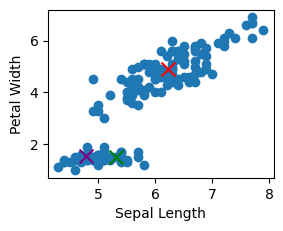

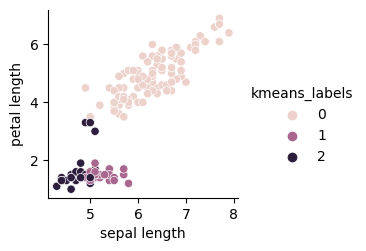

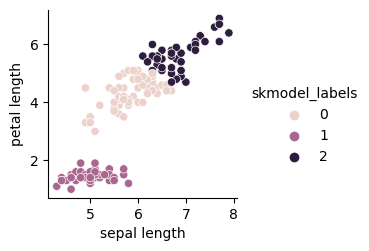

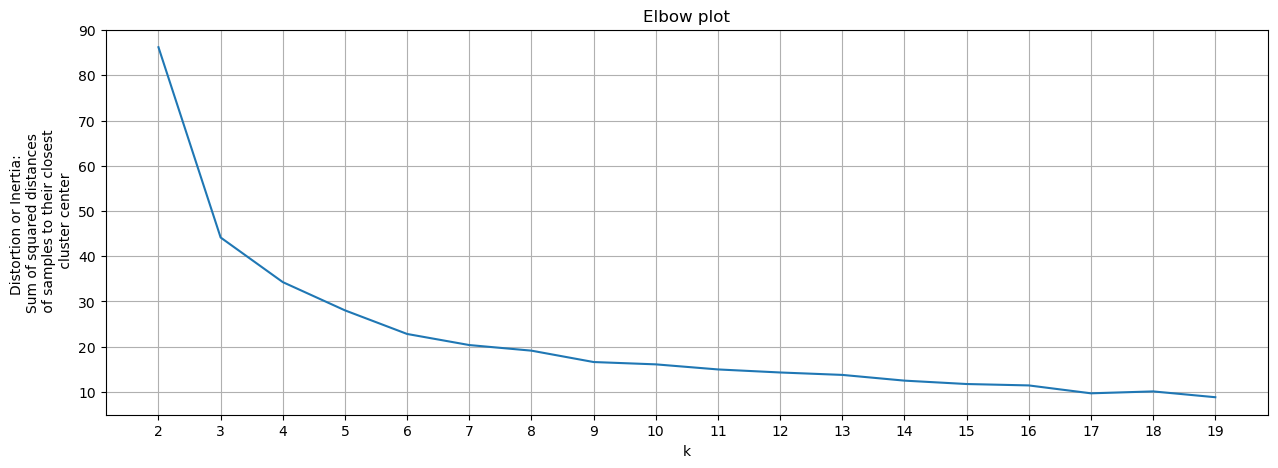

As K increases, distortion decreases.


In [4]:
#Problem 3
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = load_iris() #shift+tab

df = pd.DataFrame()
df['sepal length'] = data['data'][:,0]
df['sepal width'] = data['data'][:,1]
df['petal length'] = data['data'][:,2]
#df['petal width'] = data['data'][:,3]

X = df.to_numpy() # These are our features... there are only THREE features

df['target'] = data['target']
named_targets = []
for elm in df['target'].to_list():
    named_targets.append(data.target_names[elm])
df['species_name'] = named_targets

y = df['target'].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, idx_train, idx_test=train_test_split(
    X,y, range(X.shape[0]),
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=y)

print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

# 3D Visualization __________________________________________________________________________

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], label="Train")
ax.scatter(X_test[:,0], X_test[:,1], X_test[:,2], label="Test")
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.legend(loc="upper right")

plt.show()

# Algorithm ______________________________________________________________________________________
class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]
    
model = KMeans(k=3)
model.fit(X_train)
kmeans_labels = model.predict(X_test)
cluster_coords = model.centroids
print('predicted_labels:', kmeans_labels)
print('cluster centroids:', cluster_coords)

# Class Code Clusters ______________________________________________________________________________
df['kmeans_labels'] = model.predict(X)

plt.subplot(2, 2, 2)
plt.scatter(df['sepal length'].to_list(), df['petal length'].to_list())
plt.scatter(cluster_coords[0][0], cluster_coords[0][2], color='red', marker='x', s=100)
plt.scatter(cluster_coords[1][0], cluster_coords[1][2], color='green', marker='x', s=100)
plt.scatter(cluster_coords[2][0], cluster_coords[2][2], color='purple', marker='x', s=100)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')

plt.show()

# Sklearn Clusters _______________________________________________________________________________
from sklearn.cluster import KMeans
skmodel = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=1,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='auto',
)

skmodel.fit(X_train)
skmodel.labels_ # training labels
skmodel.predict(X_test) # predict labels

skmodel_labels = skmodel.predict(X)
df['skmodel_labels'] = skmodel_labels

sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal length'], hue='kmeans_labels')
sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal length'], hue='skmodel_labels')

plt.show()

#Elbow chart
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k,init='k-means++',
    n_init=1,)
    kmeans.fit(X_train)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.xticks(ticks = range(2, 20))
plt.title('Elbow plot')
plt.xlabel('k')
plt.ylabel('Distortion or Inertia: \nSum of squared distances\n of samples to their closest\n cluster center')

plt.show()
print("As K increases, distortion decreases.")